In [13]:
import pandas as pd

In [2]:
pd.__version__

'1.0.1'

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# importing the dataset from the seaborn library
titanic= sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
#details of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [17]:
titanic.shape 

(891, 15)

In [49]:
#setiing the figuresize and dpi

#plt.rcParams['figsize']= [10,8]
#plt.rcParams['figure.dpi']= 100

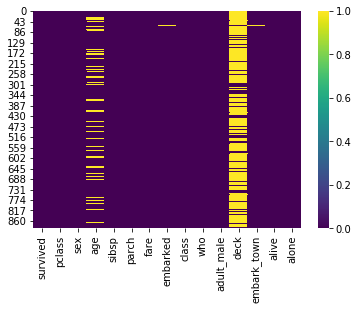

In [9]:
# Get the visualization of missing rows--->use heat map function

sns.heatmap(titanic.isnull(), cmap='viridis',cbar=True)

In [19]:
# find the coorea
cormat= titanic.corr()
cormat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


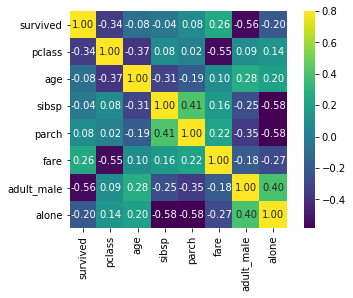

In [31]:
sns.heatmap(cormat, vmax=0.8,
           square=True,
           annot=True,
           fmt='.2f',
           cmap='viridis')

# UNIVARIATE ANALYSIS
Dist plot(displot())--> gives analysis of numerical data
Count plot(countplot())-->gives analysis of  categorical data

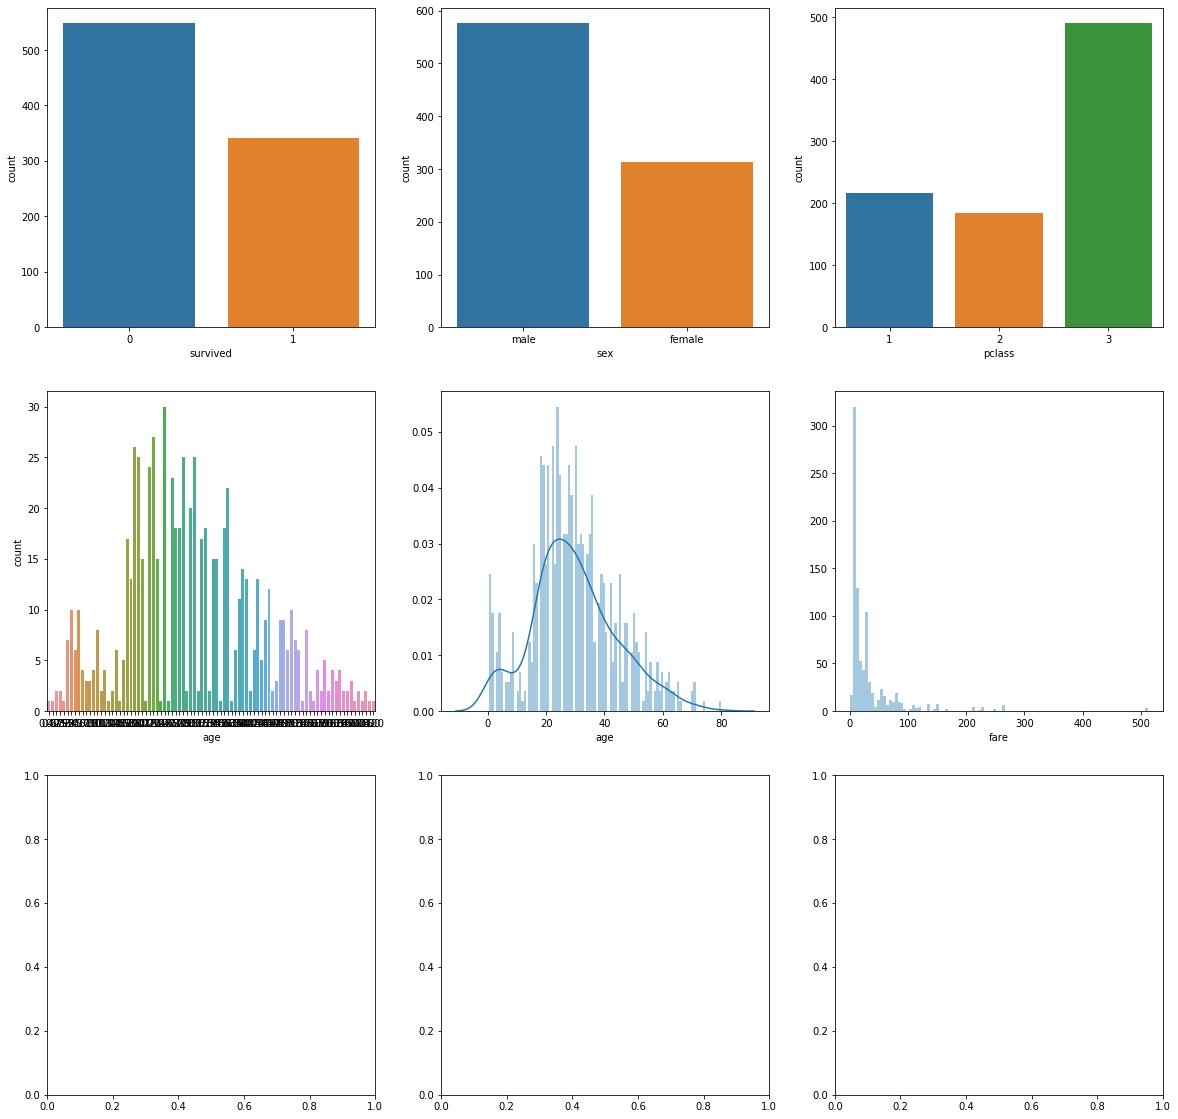

In [52]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(20,20))
sns.countplot('survived', data=titanic, ax= ax[0][0])
sns.countplot('sex', data=titanic, ax= ax[0][1])
sns.countplot('pclass', data=titanic, ax= ax[0][2])
#parch, alone, sibsp, embarked
# KDE PLOT Kernel Density Estimator

sns.countplot('age', data=titanic, ax= ax[1][0])
sns.distplot(titanic['age'].dropna(),ax= ax[1][1], kde=True, bins=100)
sns.distplot(titanic['fare'].dropna(),ax= ax[1][2], kde=False, bins=100)

# Survived Columns Analysis

In [33]:
# 1--> survived
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

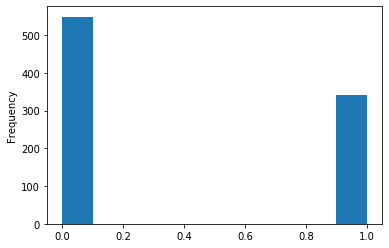

In [34]:
titanic['survived'].plot.hist()

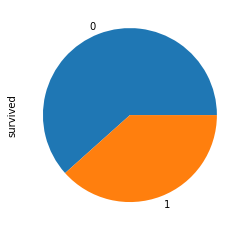

In [35]:
titanic['survived'].value_counts().plot.pie()

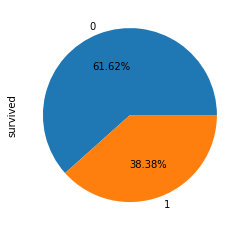

In [37]:
titanic['survived'].value_counts().plot.pie(autopct= '%.2f%%')

# EDA on Passenger Class

In [39]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [44]:
#list(titanic.groupby(['pclass'])).value_counts()
titanic.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

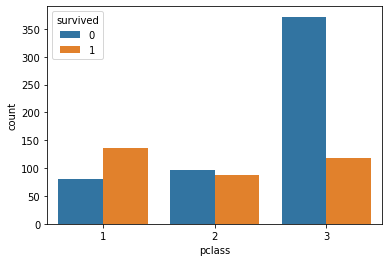

In [45]:
sns.countplot('pclass', data=titanic, hue='survived')

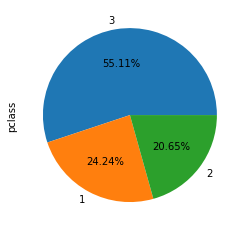

In [46]:
titanic['pclass'].value_counts().plot.pie(autopct= '%.2f%%')

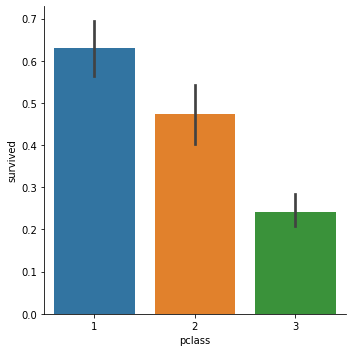

In [48]:
#Categorical--> swarm, box, violin
#One col should be categorical data
# in catplot both x &y can be categorical data
#black insk specify error bar---> if any discripancy happen then min is ___ and max is ___
#checking the survival rate/probabilty using bar plot in categorical data

sns.catplot(x= 'pclass' ,y= 'survived', kind='bar',data=titanic)

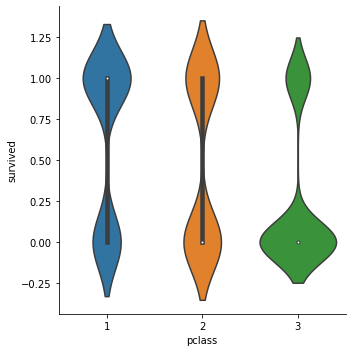

In [50]:
#checking the survival rate/probabilty using VIOLIN plot in categorical data
# KDE PLOT Kernel Density Estimator
sns.catplot(x= 'pclass' ,y= 'survived', kind='violin',data=titanic)

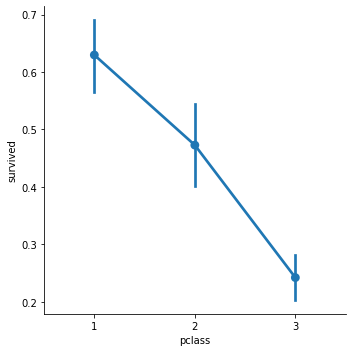

In [51]:
#checking the survival rate/probabilty using POINT plot in categorical data

sns.catplot(x='pclass' ,y= 'survived', kind='point',data=titanic)

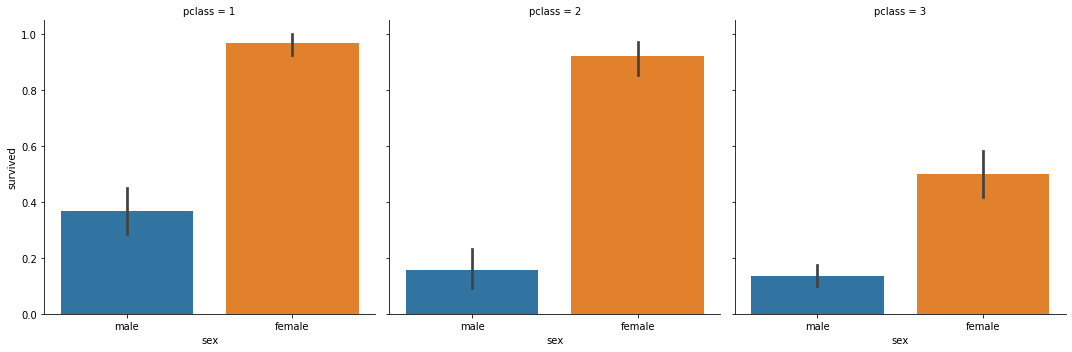

In [55]:
#Plotting BAR Plot survival rate for diff sex for diff pclass seperately.
sns.catplot(x='sex', y='survived', data=titanic, kind='bar', col='pclass')

In [ ]:
#Violin plot, box, bar, swarm on AGE ANALYSIS